In [2]:
print("hello")

hello


In [3]:
!pip install pandas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('shopping_trends_updated.csv')

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.tail(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [7]:
ages = df['Age']

In [8]:
gender = df['Gender']

In [9]:
df.head('Age')

TypeError: cannot do positional indexing on RangeIndex with these indexers [Age] of type str

In [10]:
print(df.head('Age'))

TypeError: cannot do positional indexing on RangeIndex with these indexers [Age] of type str

In [11]:
print(df['Age'])

0       55
1       19
2       50
3       21
4       45
        ..
3895    40
3896    52
3897    46
3898    44
3899    52
Name: Age, Length: 3900, dtype: int64


In [12]:
itemPurchased = df['Item Purchased']
category = df['Category']
purchaseAmount = df['Purchase Amount (USD)']
location = df['Location']
size = df['Size']
color = df['Color']

In [13]:
print(df['Color'])

0            Gray
1          Maroon
2          Maroon
3          Maroon
4       Turquoise
          ...    
3895    Turquoise
3896        White
3897        Green
3898        Brown
3899        Beige
Name: Color, Length: 3900, dtype: object


In [14]:
season = df['Season']
reviewRating = df['Review Rating']
subscriptionStatus = df['Subscription Status']
shippingType = df['Shipping Type']
discountApplied = df['Discount Applied']
promoCodeUsed = df['Promo Code Used']
previousPurchases = df['Previous Purchases']
paymentMethod = df['Payment Method']
frequencyOfPurchases = df['Frequency of Purchases']

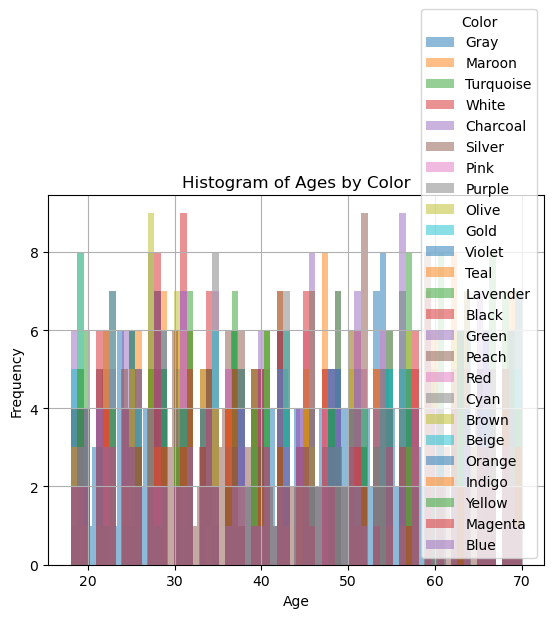

In [18]:
import matplotlib.pyplot as plt

# This is assuming 'Color' is a categorical variable with distinct values like 'Red', 'Blue', etc.
# We will plot a separate histogram for each color category.
unique_colors = df['Color'].unique()

for color in unique_colors:
    subset = df[df['Color'] == color]  # Creates a subset of the DataFrame based on the color
    subset['Age'].hist(bins=70, alpha=0.5, label=str(color))  # Adjust bins as needed

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages by Color')
plt.legend(title='Color')
plt.show()


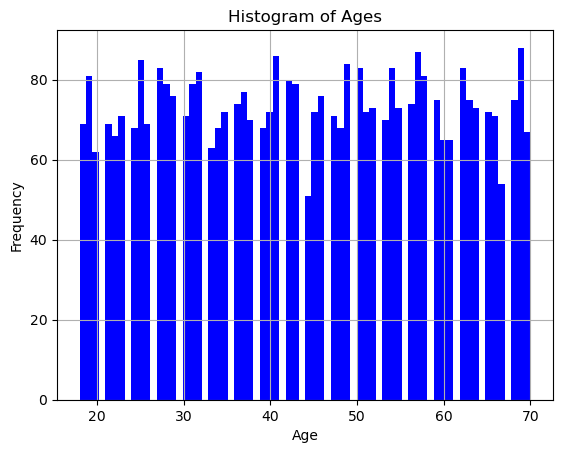

In [17]:
df['Age'].hist(bins=70, color='blue')  # Adjust bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()


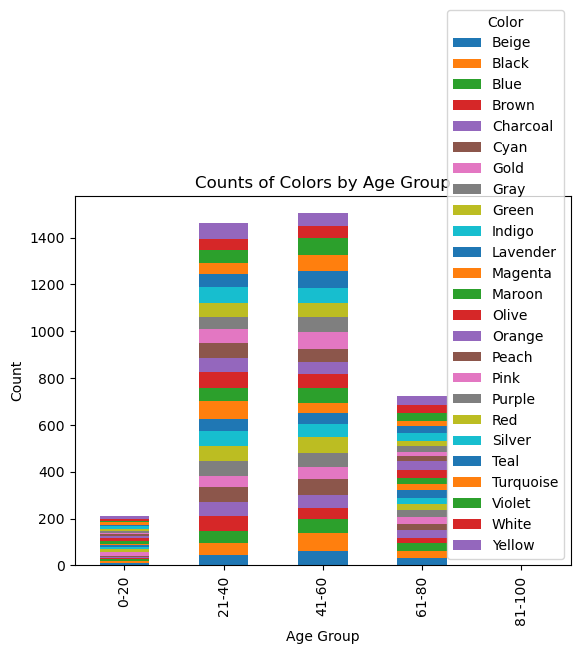

In [19]:
bins = [0, 20, 40, 60, 80, 100]  # Example age groups
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Now create a pivot table to count colors within each age group
pivot_table = df.pivot_table(index='AgeGroup', columns='Color', aggfunc='size', fill_value=0)

# Plotting the bar chart
pivot_table.plot(kind='bar', stacked=True)  # Use stacked=False if you prefer separate bars
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Colors by Age Group')
plt.show()

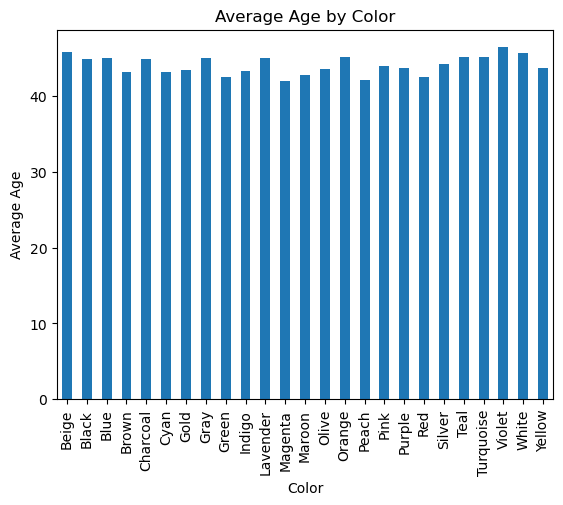

In [20]:
# This will create a new DataFrame with the average age for each color
average_ages = df.groupby('Color')['Age'].mean()
# For median age
median_ages = df.groupby('Color')['Age'].median()

# For counting entries (number of individuals) for each color
count_ages = df.groupby('Color')['Age'].count()
import matplotlib.pyplot as plt

# Replace 'average_ages' with 'median_ages' or 'count_ages' depending on your choice above
average_ages.plot(kind='bar')  # You can change 'average_ages' to your aggregated DataFrame
plt.xlabel('Color')
plt.ylabel('Average Age')  # Change this label depending on your aggregation method
plt.title('Average Age by Color')  # Adjust title accordingly
plt.show()


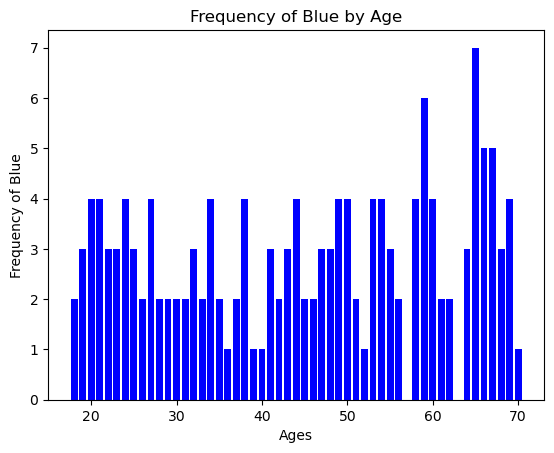

In [21]:
specific_color_df = df[df['Color'] == 'Blue']  # Replace 'Blue' with your chosen color
age_counts = specific_color_df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color='blue')  # You can change 'blue' to any color you like
plt.xlabel('Ages')
plt.ylabel('Frequency of Blue')  # Replace 'Blue' with your chosen color
plt.title('Frequency of Blue by Age')  # Again, replace 'Blue' as necessary
plt.show()


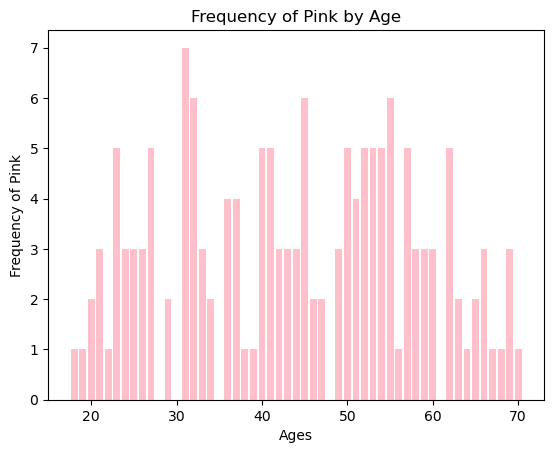

In [23]:
specific_color_df = df[df['Color'] == 'Pink']  # Replace 'Blue' with your chosen color
age_counts = specific_color_df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color='pink')  # You can change 'blue' to any color you like
plt.xlabel('Ages')
plt.ylabel('Frequency of Pink')  # Replace 'Blue' with your chosen color
plt.title('Frequency of Pink by Age')  # Again, replace 'Blue' as necessary
plt.show()

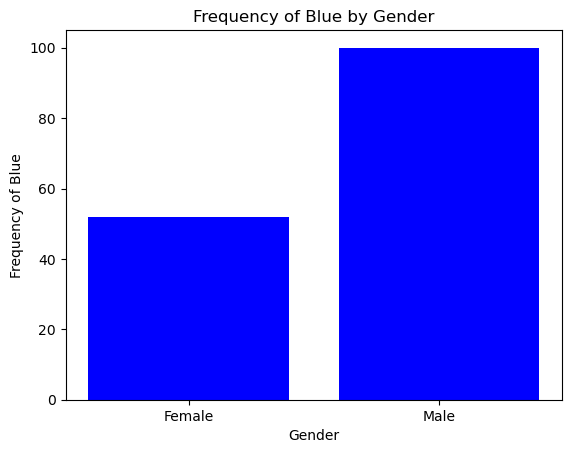

In [24]:
specific_color_df = df[df['Color'] == 'Blue']  # Replace 'Blue' with the color you're interested in
gender_counts = specific_color_df['Gender'].value_counts().sort_index()
plt.bar(gender_counts.index, gender_counts.values, color='blue')  # Change 'blue' to any color you prefer
plt.xlabel('Gender')
plt.ylabel(f'Frequency of Blue')  # Replace 'Blue' with the color you're focused on
plt.title('Frequency of Blue by Gender')  # Again, replace 'Blue' as necessary
plt.show()

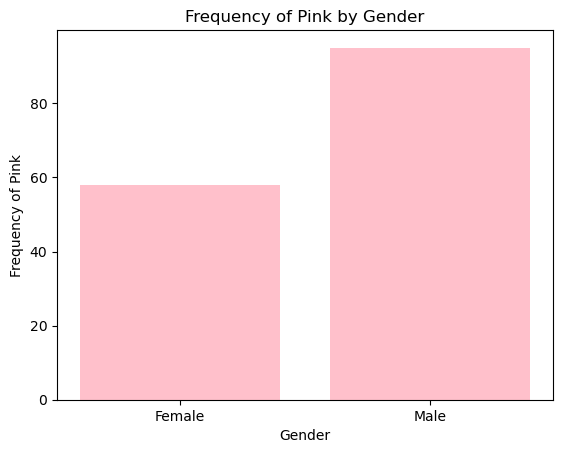

In [25]:
specific_color_df = df[df['Color'] == 'Pink']  # Replace 'Blue' with the color you're interested in
gender_counts = specific_color_df['Gender'].value_counts().sort_index()
plt.bar(gender_counts.index, gender_counts.values, color='pink')  # Change 'blue' to any color you prefer
plt.xlabel('Gender')
plt.ylabel(f'Frequency of Pink')  # Replace 'Blue' with the color you're focused on
plt.title('Frequency of Pink by Gender')  # Again, replace 'Blue' as necessary
plt.show()

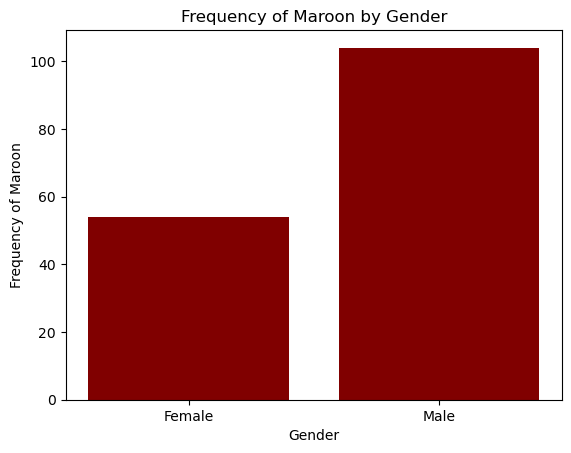

In [26]:
specific_color_df = df[df['Color'] == 'Maroon']  # Replace 'Blue' with the color you're interested in
gender_counts = specific_color_df['Gender'].value_counts().sort_index()
plt.bar(gender_counts.index, gender_counts.values, color='maroon')  # Change 'blue' to any color you prefer
plt.xlabel('Gender')
plt.ylabel(f'Frequency of Maroon')  # Replace 'Blue' with the color you're focused on
plt.title('Frequency of Maroon by Gender')  # Again, replace 'Blue' as necessary
plt.show()

In [27]:
 gender_totals = df['Gender'].value_counts()
print(gender_totals)


Male      2652
Female    1248
Name: Gender, dtype: int64


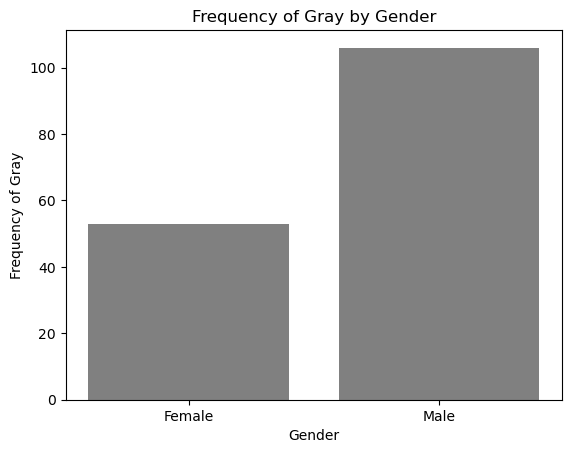

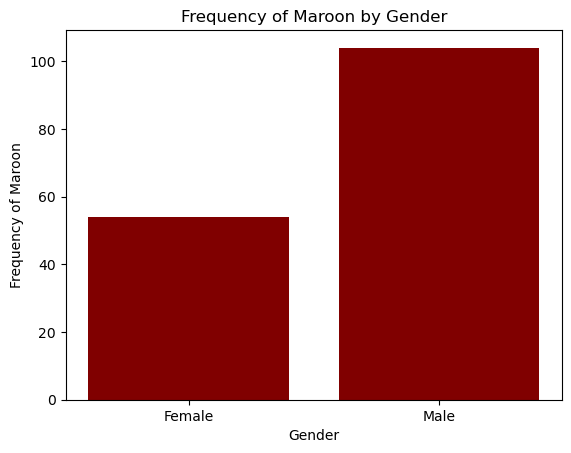

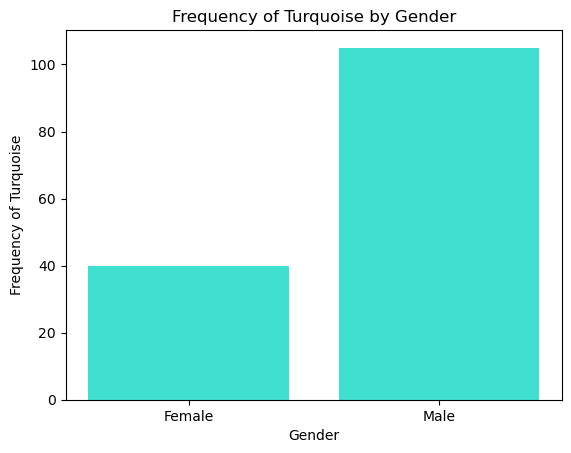

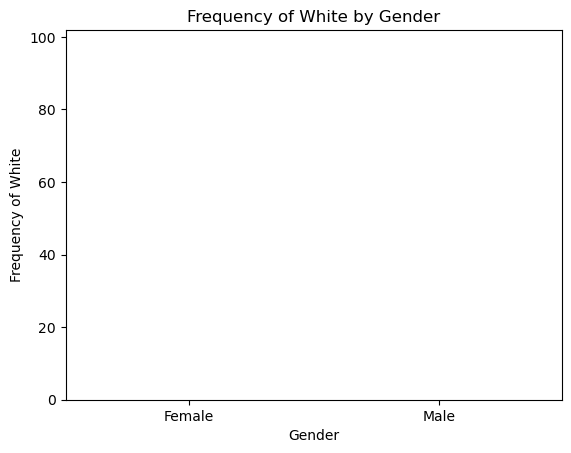

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

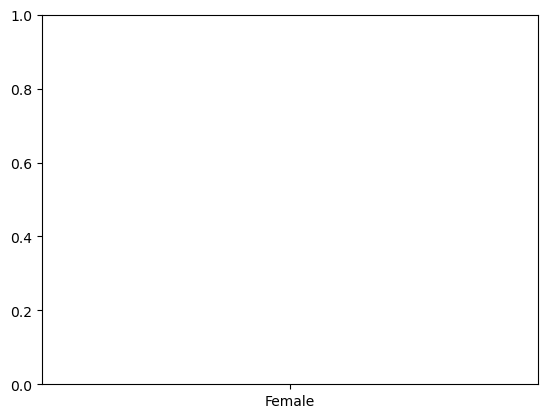

In [28]:
unique_colors = df['Color'].unique()  # Gets all unique colors

for color in unique_colors:
    # Filter the DataFrame for the current color in the loop
    specific_color_df = df[df['Color'] == color]
    
    # Get the gender count for the specific color
    gender_counts = specific_color_df['Gender'].value_counts().sort_index()
    
    # Create the bar plot
    plt.figure()  # This ensures a new figure is created for each plot
    plt.bar(gender_counts.index, gender_counts.values, color=color.lower())  # Convert color to lowercase for the color parameter
    plt.xlabel('Gender')
    plt.ylabel(f'Frequency of {color}')  # Dynamically change the label to match the current color
    plt.title(f'Frequency of {color} by Gender')  # Change the title for each color
    plt.show()


In [32]:
color_totals = df['Color'].value_counts()
print(color_totals)


Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64


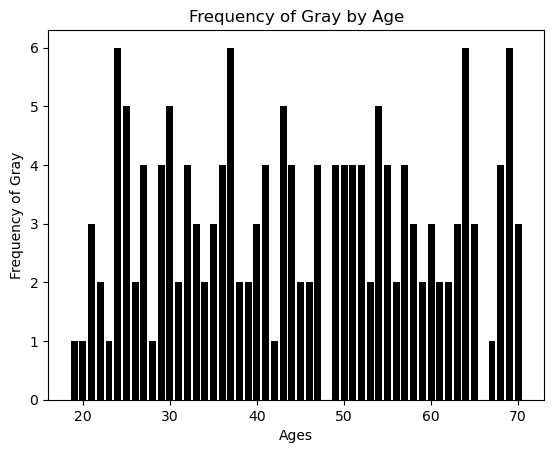

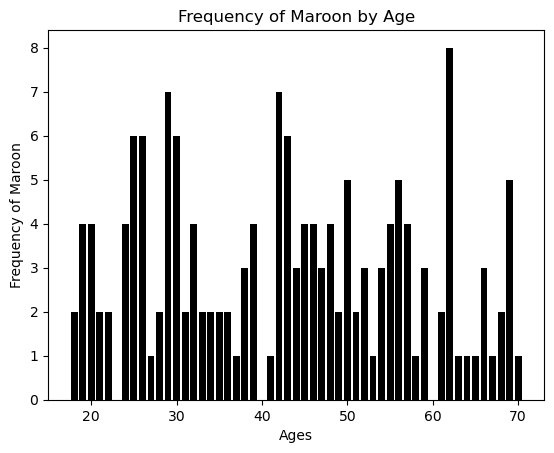

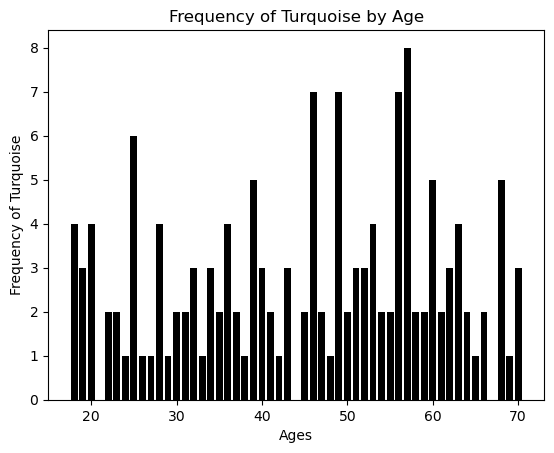

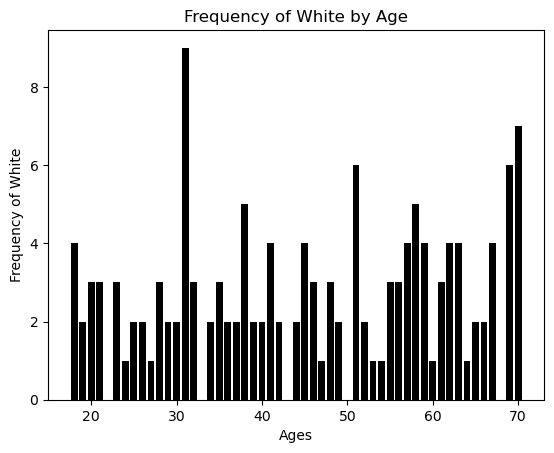

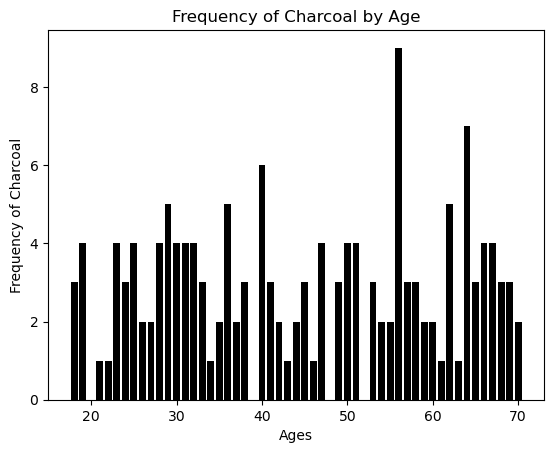

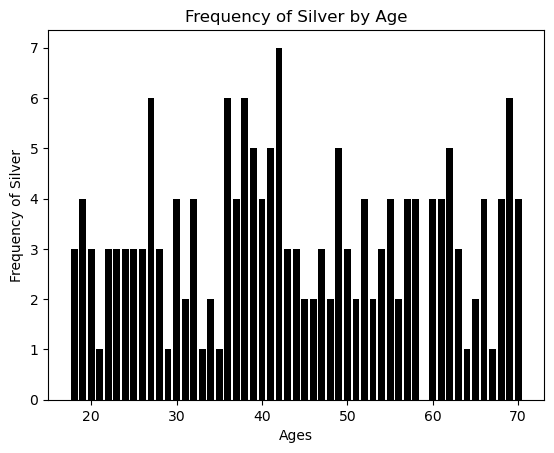

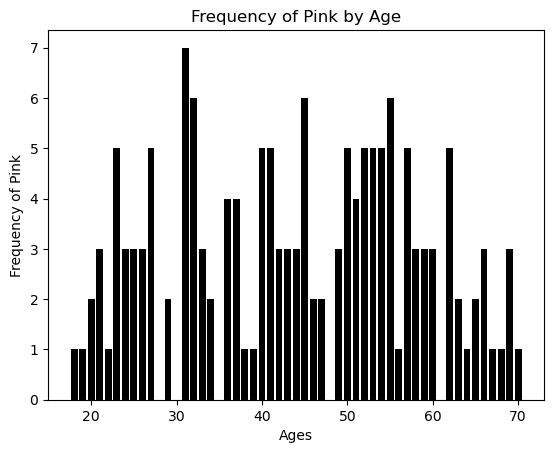

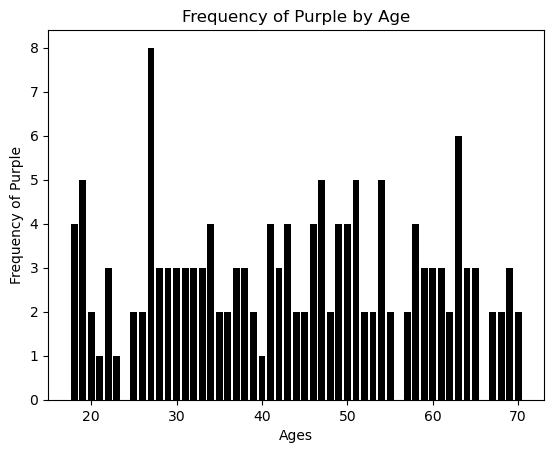

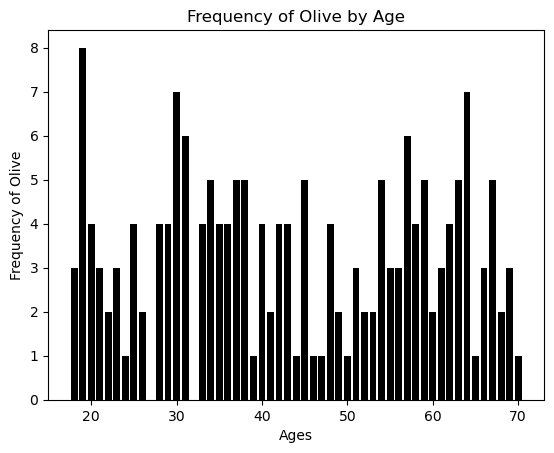

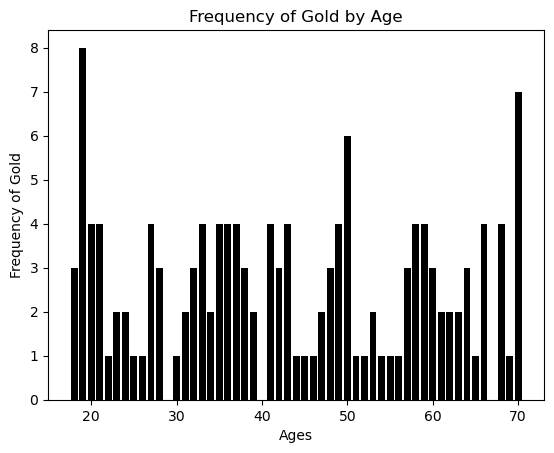

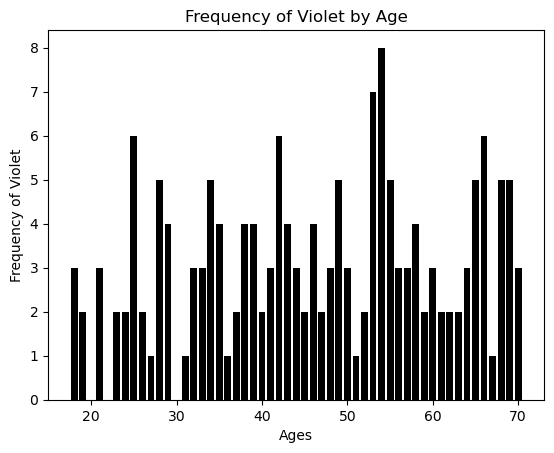

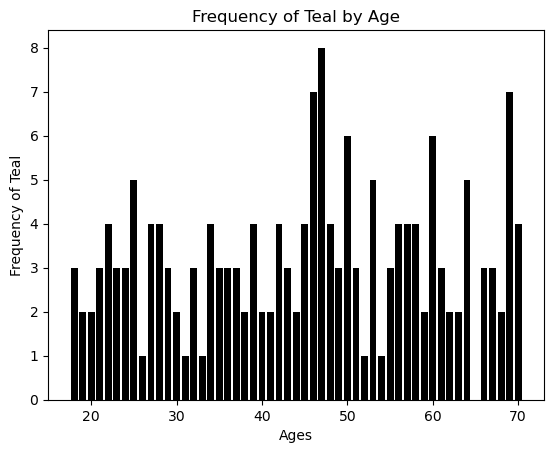

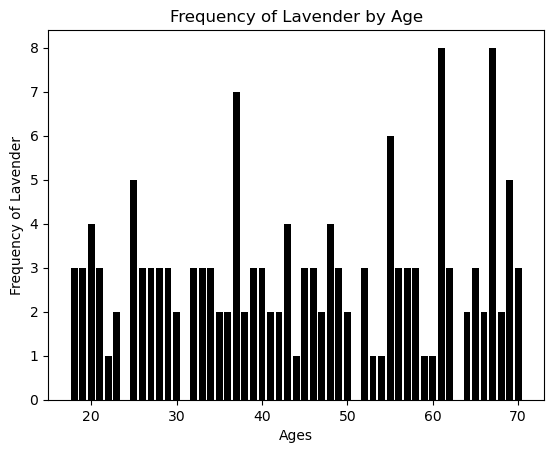

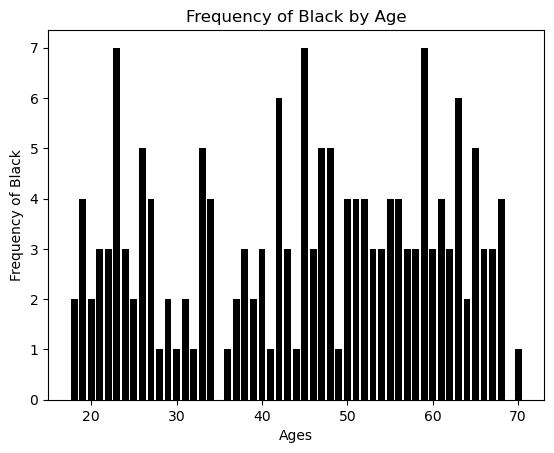

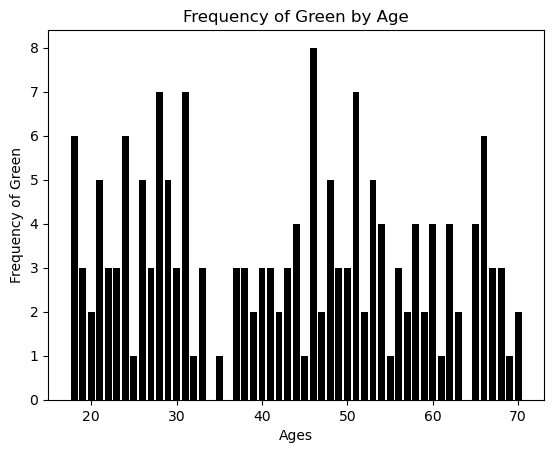

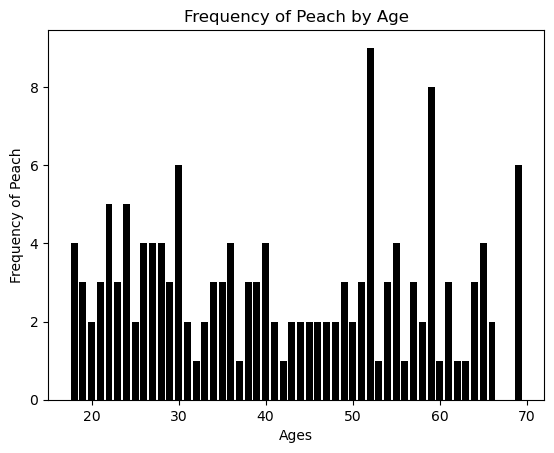

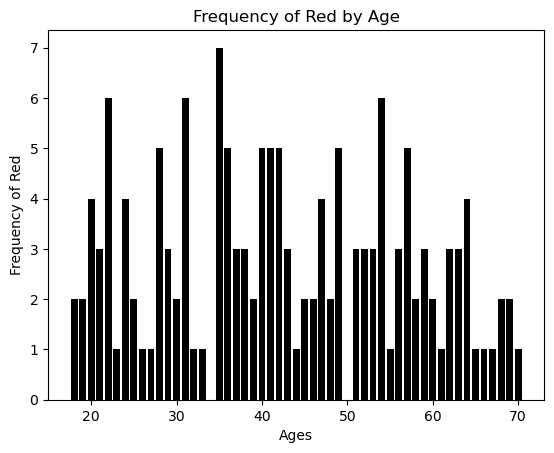

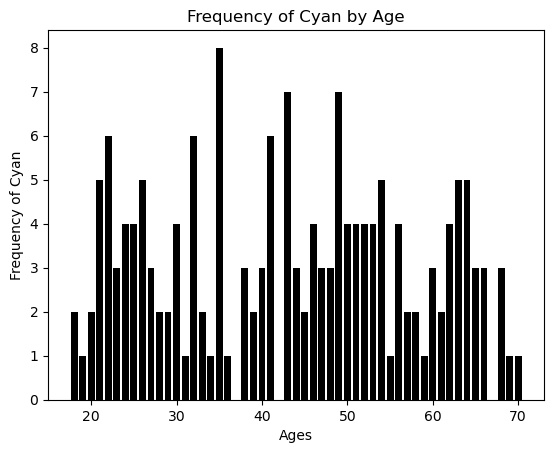

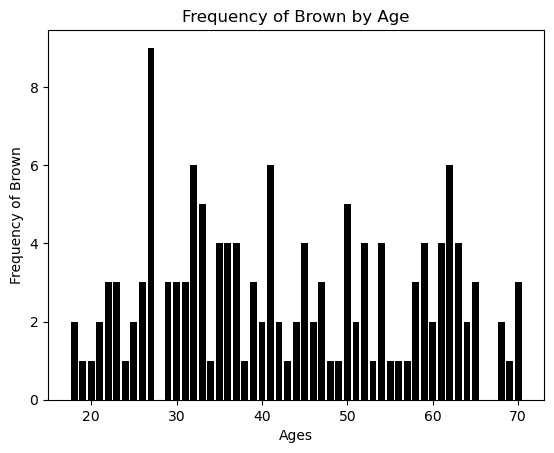

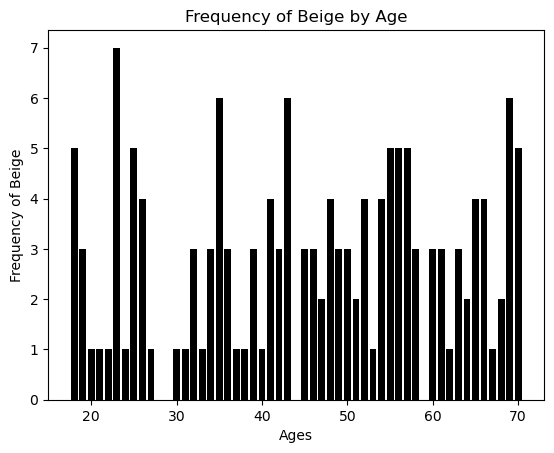

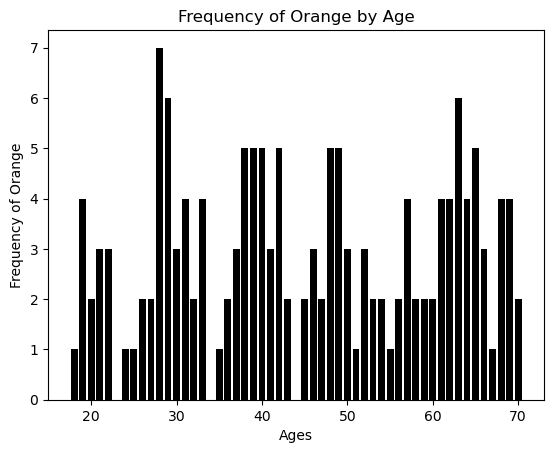

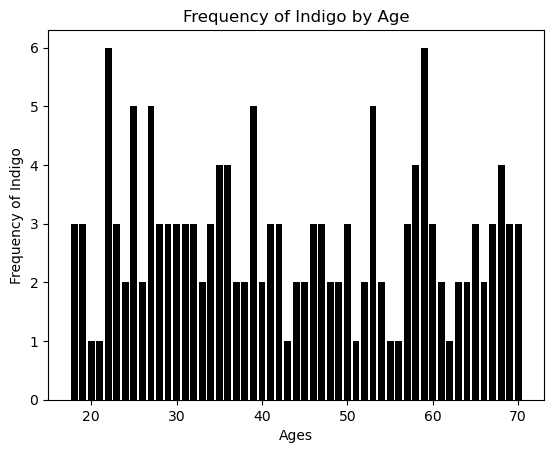

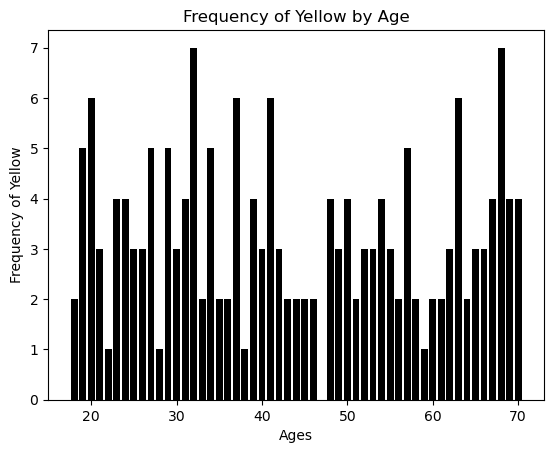

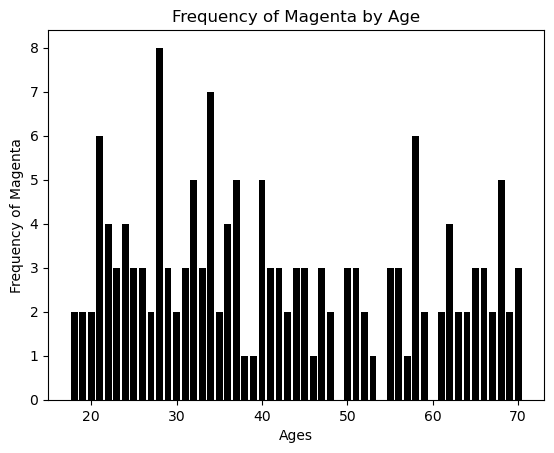

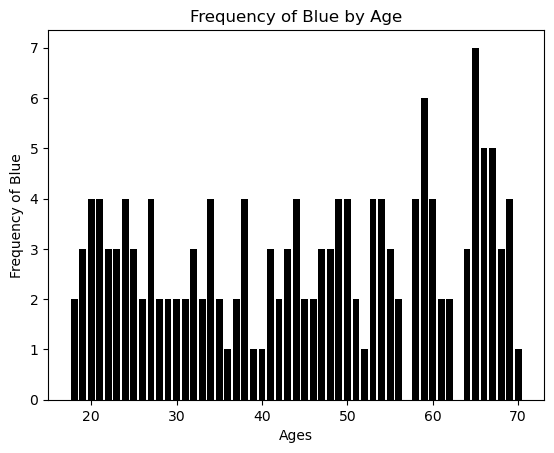

In [34]:
# Get unique colors
unique_colors = df['Color'].unique()

# Loop through each color and plot the data
for color in unique_colors:
    # Filter the DataFrame for the specific color
    specific_color_df = df[df['Color'] == color]
    
    # Count the occurrences of each age for the specific color
    age_counts = specific_color_df['Age'].value_counts().sort_index()
    
    # Plot the data
    plt.figure()  # Create a new figure for each color
    plt.bar(age_counts.index, age_counts.values, color='black')  # Convert color to lowercase for consistency
    plt.xlabel('Ages')
    plt.ylabel(f'Frequency of {color}')  # Replace {color} with the current color in the loop
    plt.title(f'Frequency of {color} by Age')  # Again, replace {color} as necessary
    plt.show()


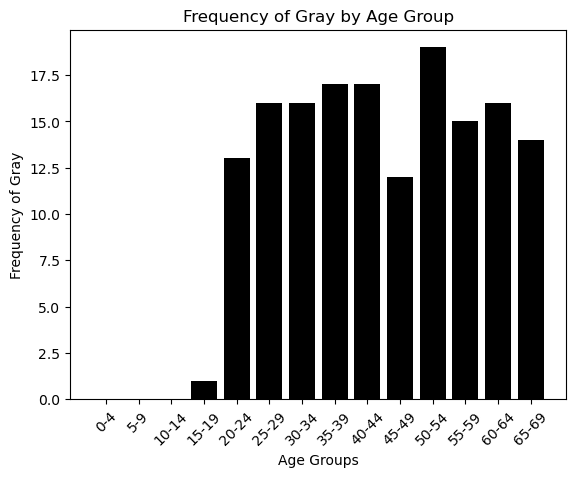

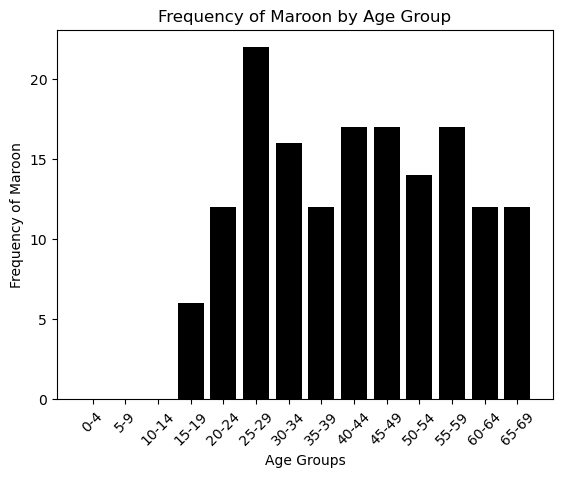

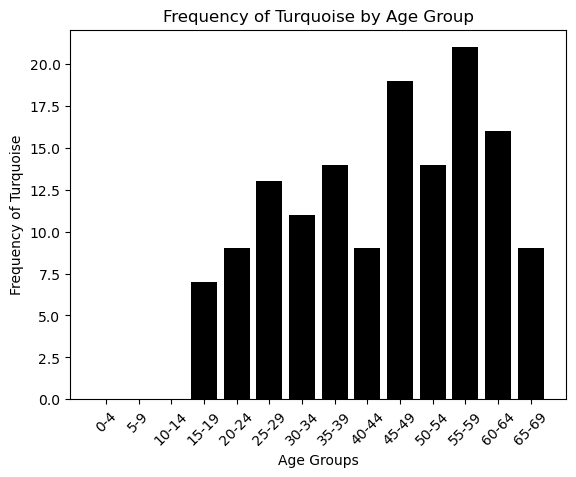

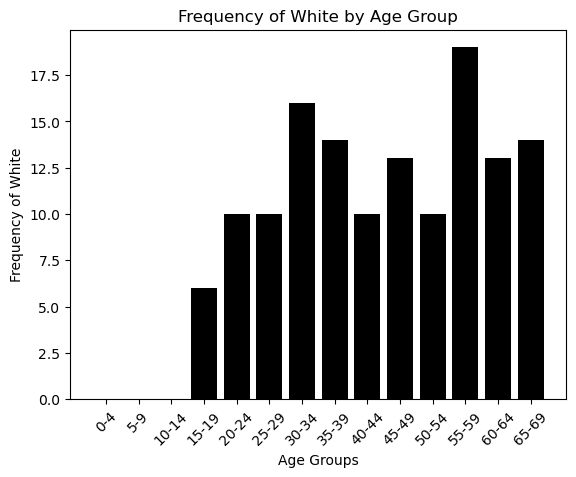

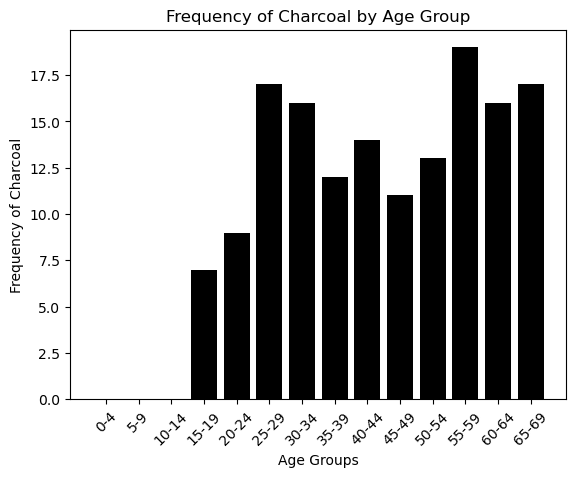

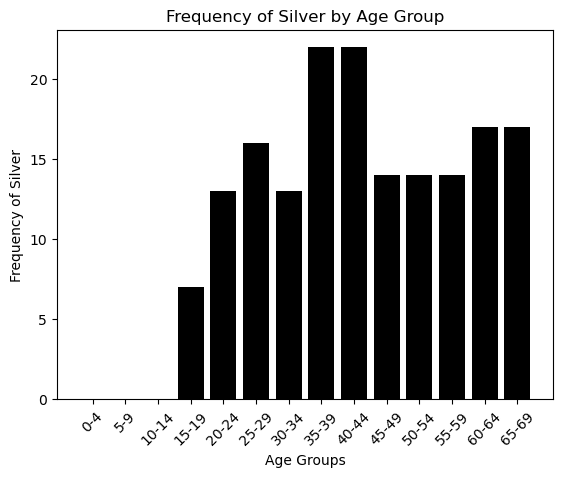

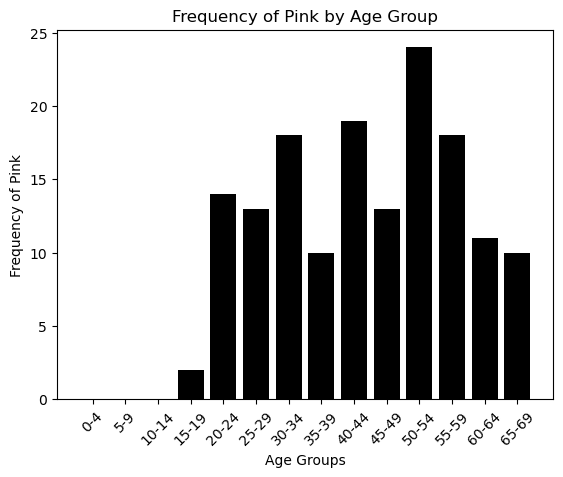

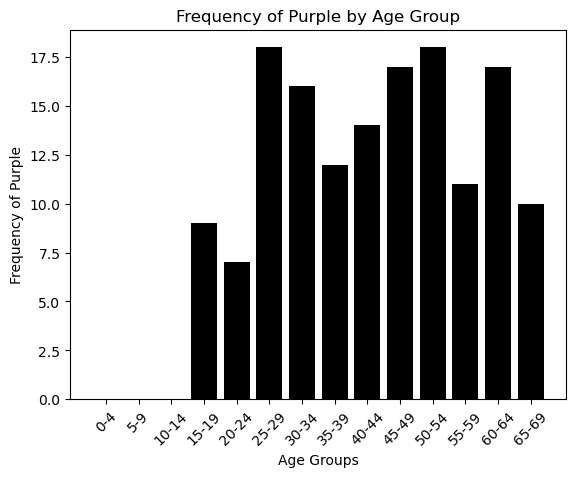

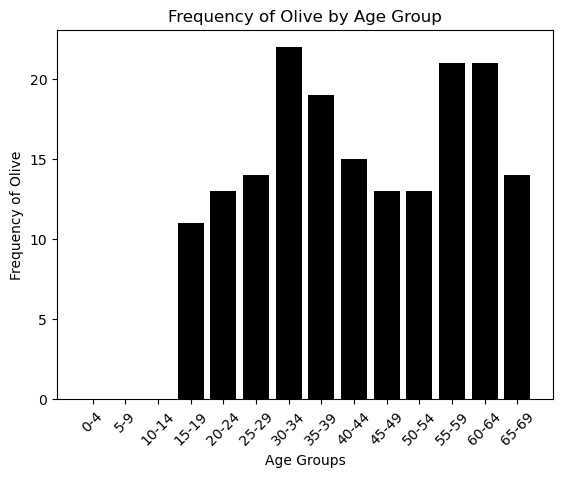

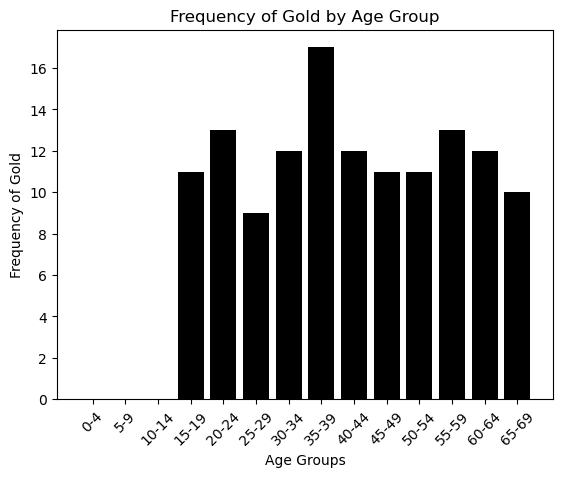

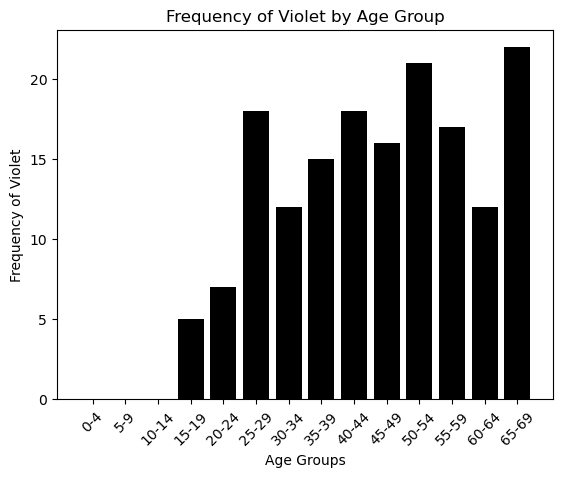

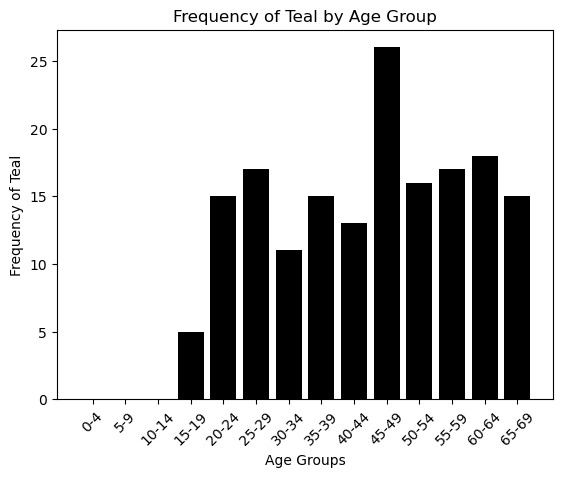

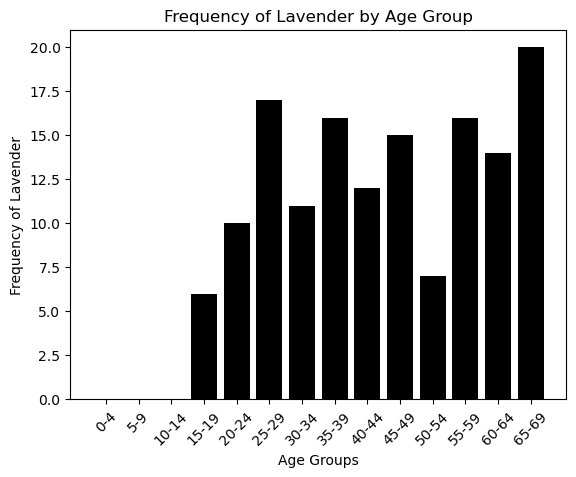

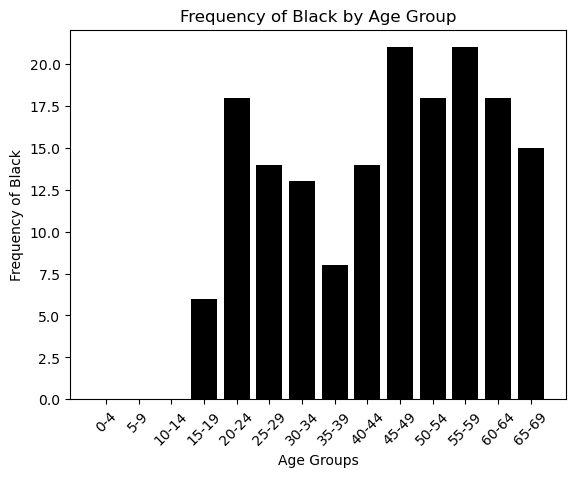

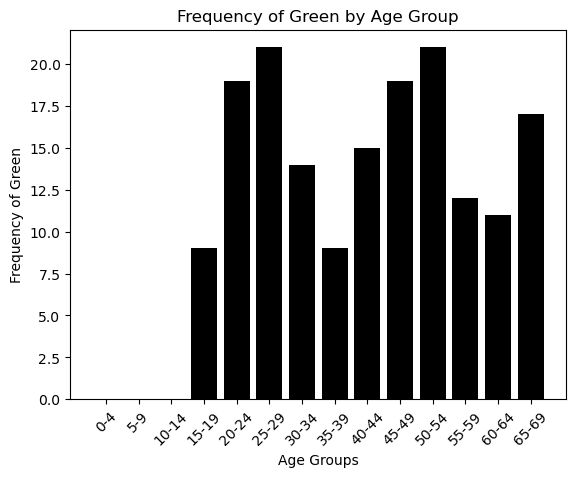

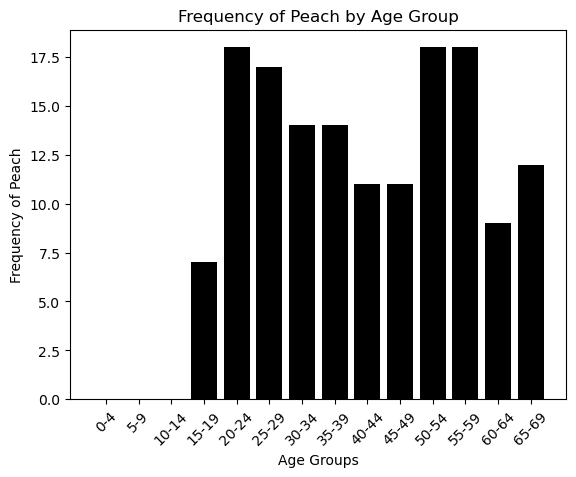

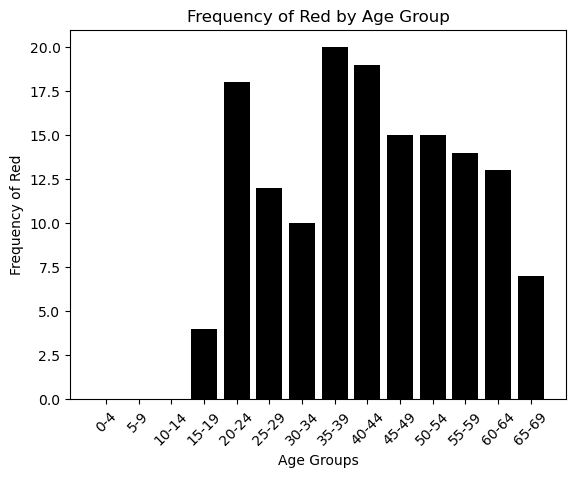

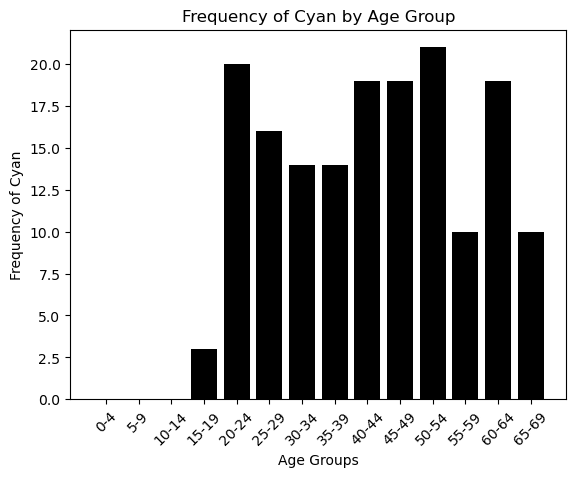

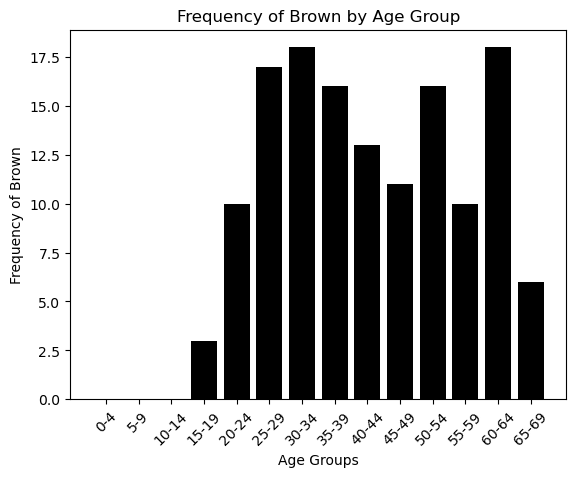

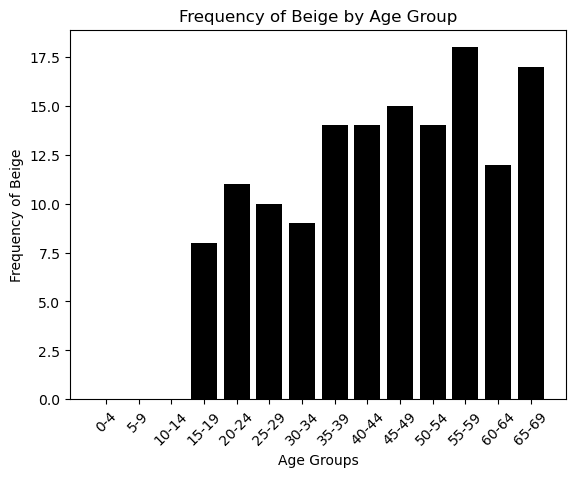

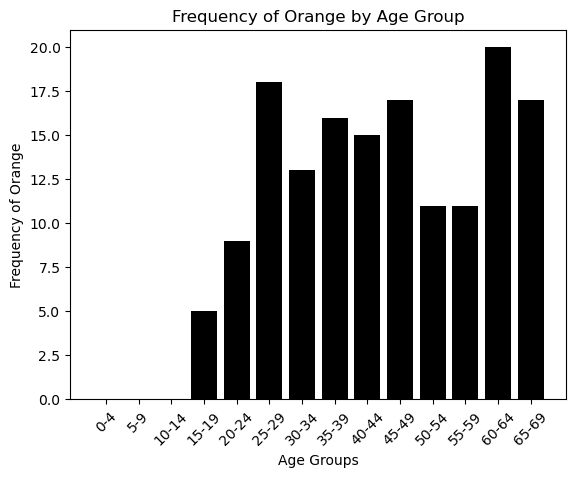

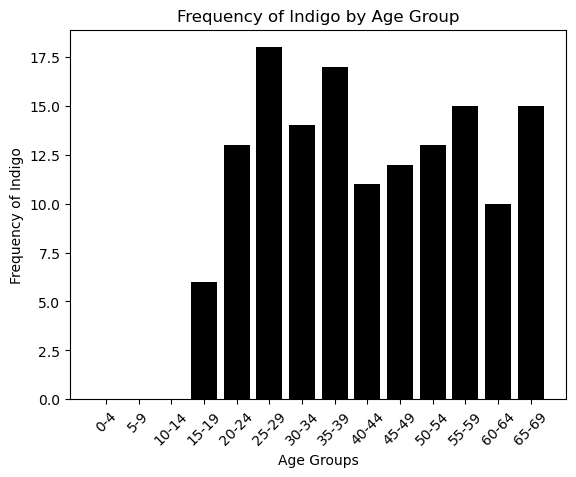

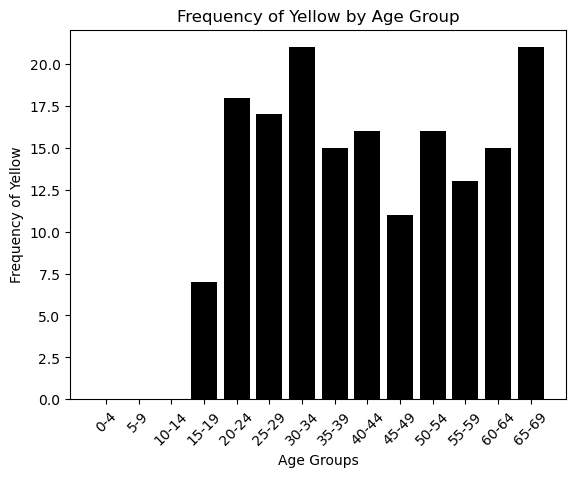

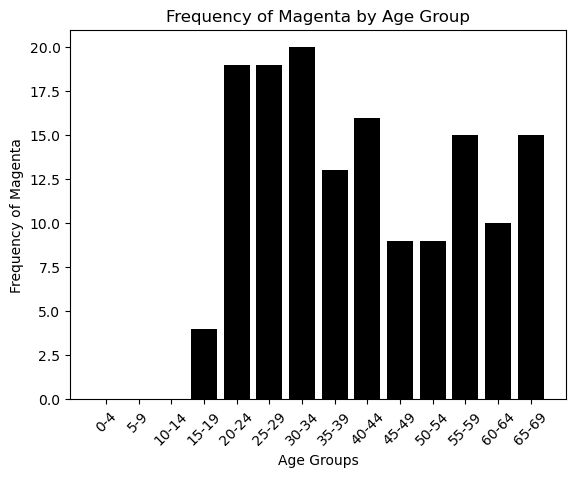

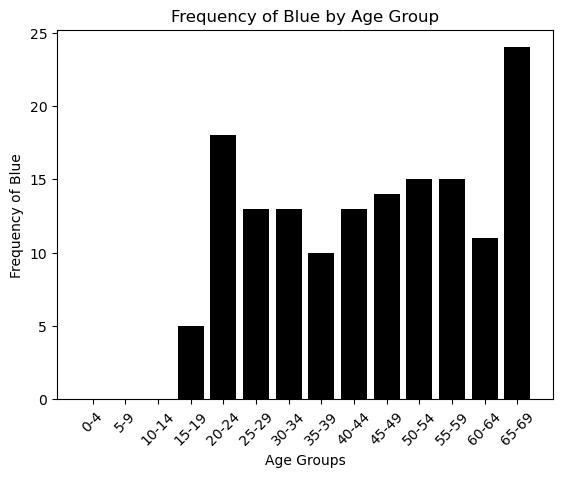

In [37]:

import numpy as np  # For creating the bins

# Define age bins
max_age = df['Age'].max()
bins = np.arange(0, max_age + 5, 5)  # Create bins from 0 to maximum age by every 5 years
labels = [f'{i}-{i + 4}' for i in range(0, max_age, 5)]  # Create label for each bin

# Categorize ages into bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Get unique colors
unique_colors = df['Color'].unique()

# Loop through each color
for color in unique_colors:
    # Filter the DataFrame for the specific color
    specific_color_df = df[df['Color'] == color]
    
    # Count the occurrences of each age group for the specific color
    age_group_counts = specific_color_df['AgeGroup'].value_counts().sort_index()
    
    # Plot the data
    plt.figure()  # Create a new figure for each color
    plt.bar(age_group_counts.index, age_group_counts.values, color='black')  # Ensure color is in a valid format
    plt.xlabel('Age Groups')
    plt.ylabel(f'Frequency of {color}')
    plt.title(f'Frequency of {color} by Age Group')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


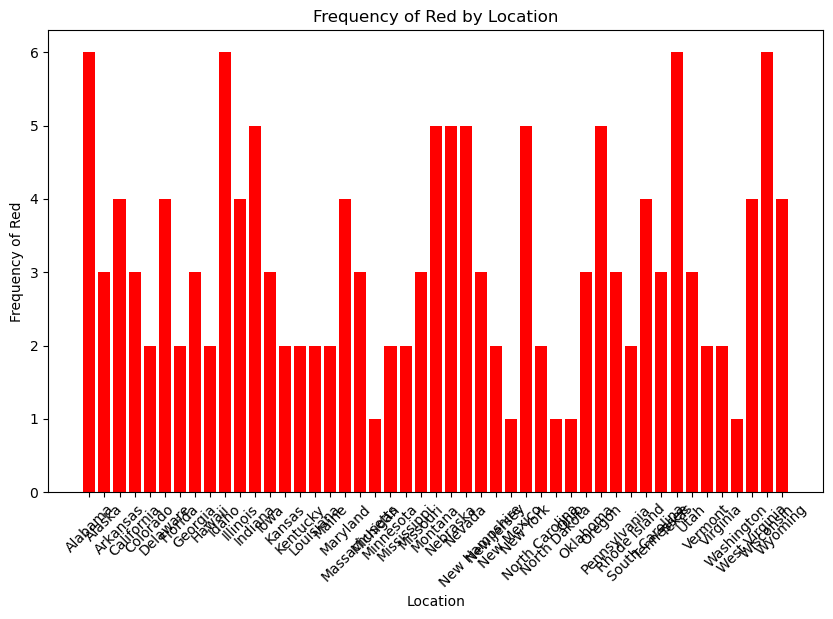

In [38]:
specific_color_df = df[df['Color'] == 'Red']  # Replace 'Red' with the color you're interested in
location_counts = specific_color_df['Location'].value_counts().sort_index()
# Set the figure size for better readability
plt.figure(figsize=(10, 6)) 

# Plotting the bar chart
plt.bar(location_counts.index, location_counts.values, color='red')  # Change 'red' to any color you prefer
plt.xlabel('Location')
plt.ylabel('Frequency of Red')  # Replace 'Red' with your chosen color
plt.title('Frequency of Red by Location')  # Again, replace 'Red' as necessary
plt.xticks(rotation=45)  # Rotate labels if they overlap or are too long
plt.show()


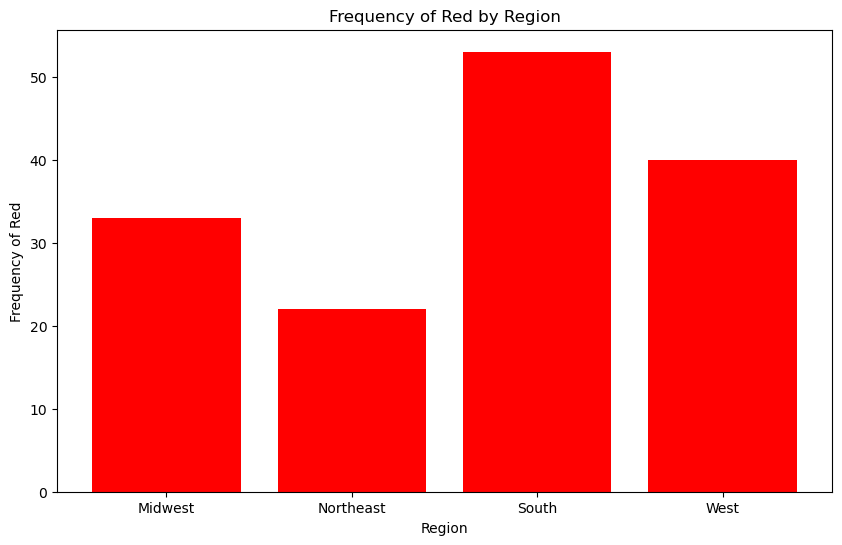

In [39]:
region_mapping = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Michigan': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest',
    'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',
    
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South',
    'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South',
    
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West',
    'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West',
    'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}

df['Region'] = df['Location'].map(region_mapping)
specific_color_df = df[df['Color'] == 'Red']  # Replace 'Red' with your chosen color
region_counts = specific_color_df['Region'].value_counts().sort_index()
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(region_counts.index, region_counts.values, color='red')  # Change 'red' to any color you prefer
plt.xlabel('Region')
plt.ylabel(f'Frequency of Red')  # Replace 'Red' with your chosen color
plt.title('Frequency of Red by Region')  # Again, replace 'Red' as necessary
plt.show()



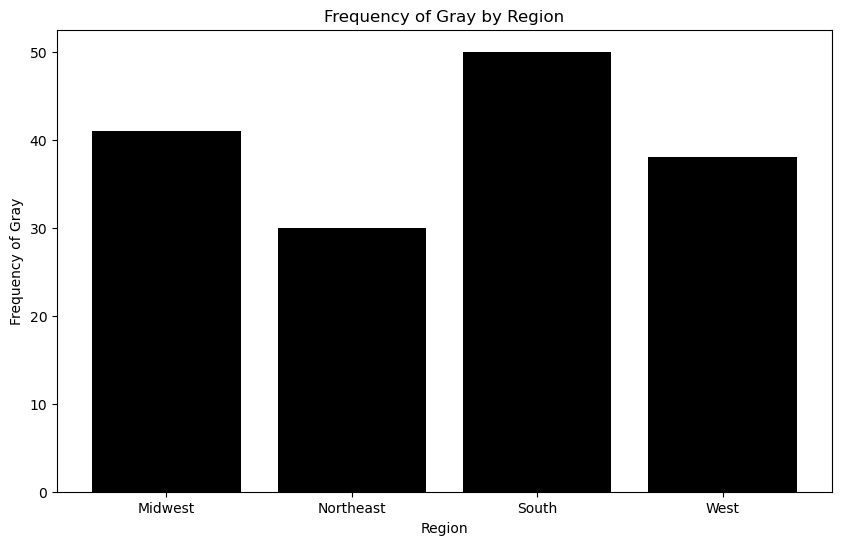

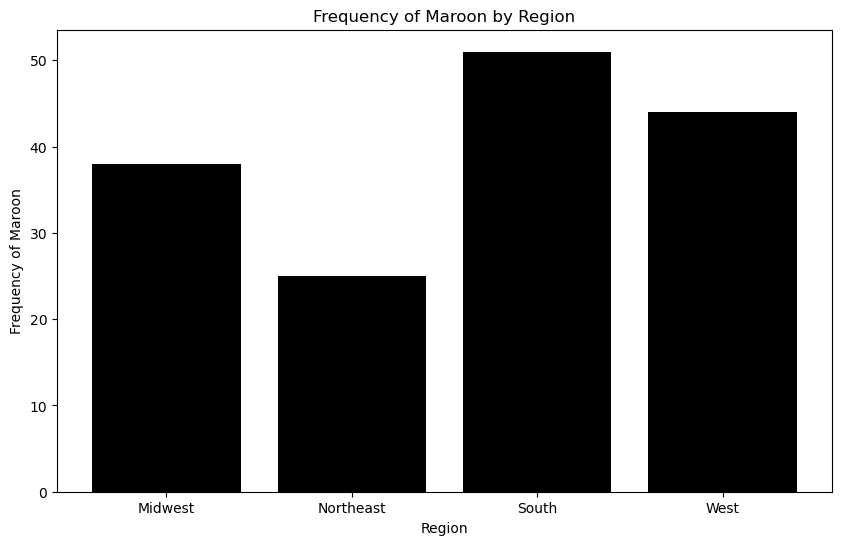

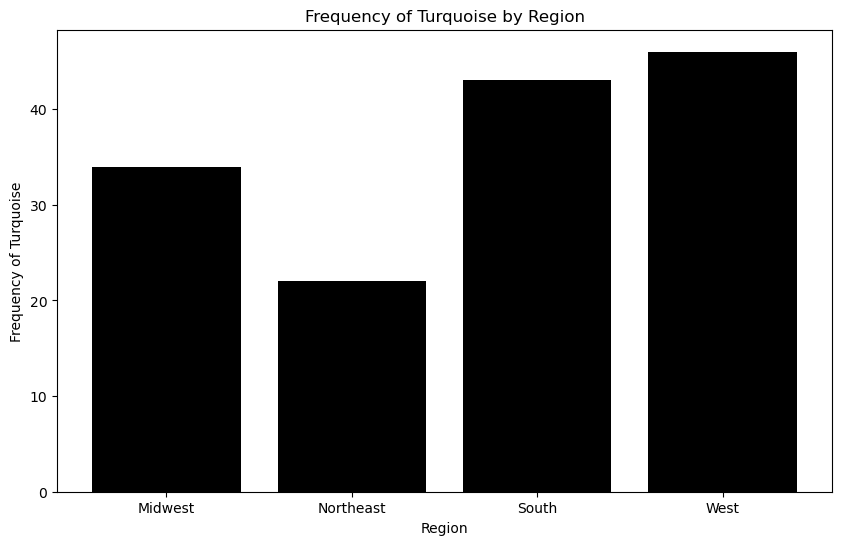

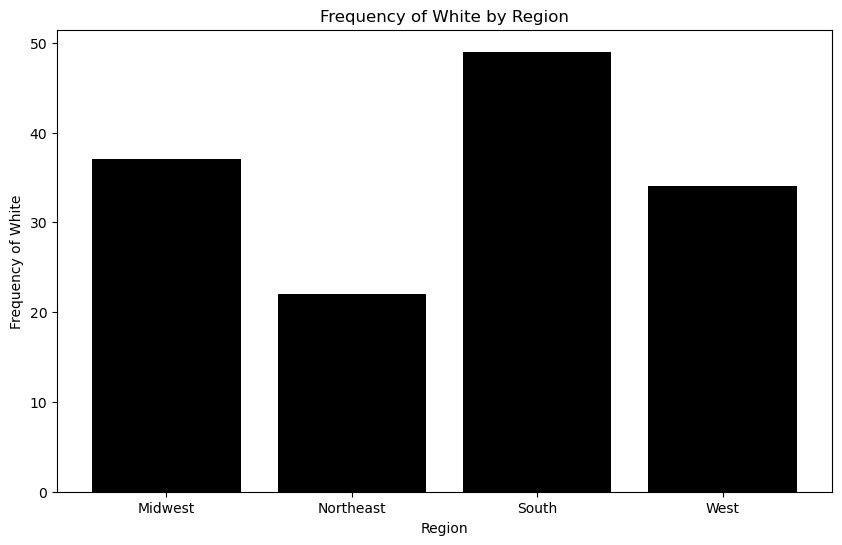

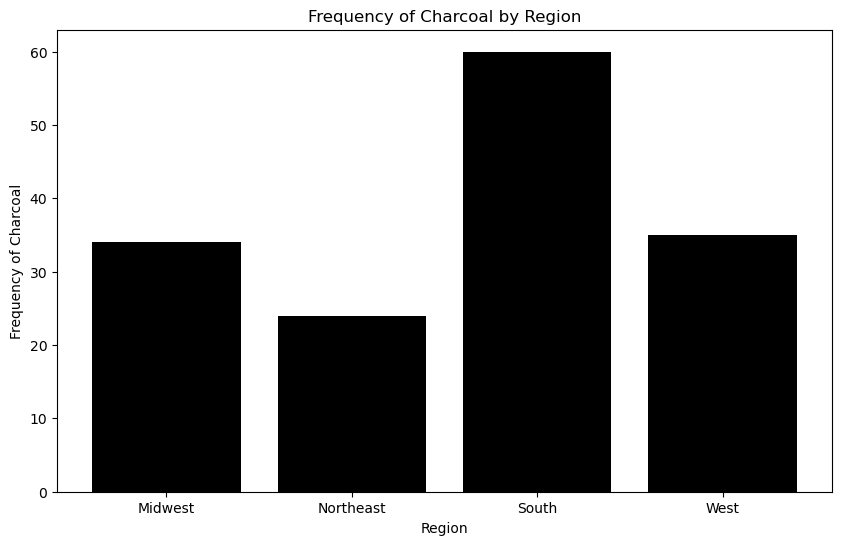

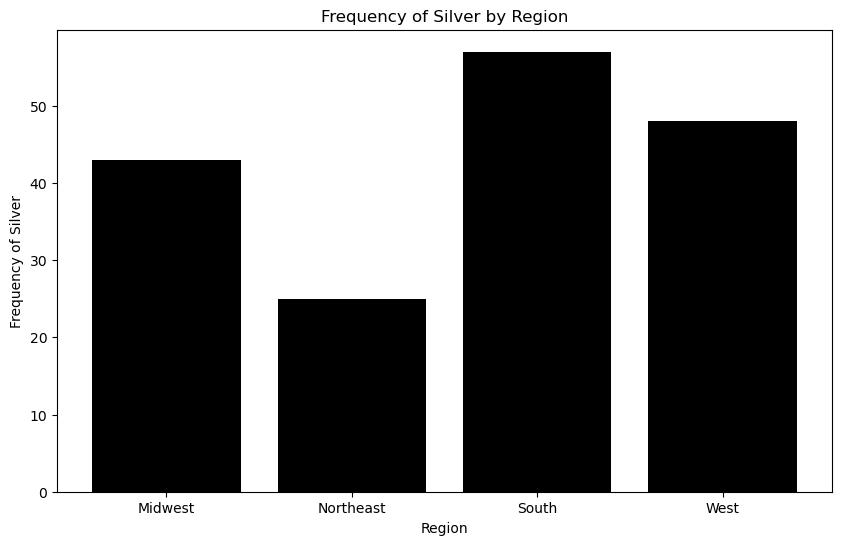

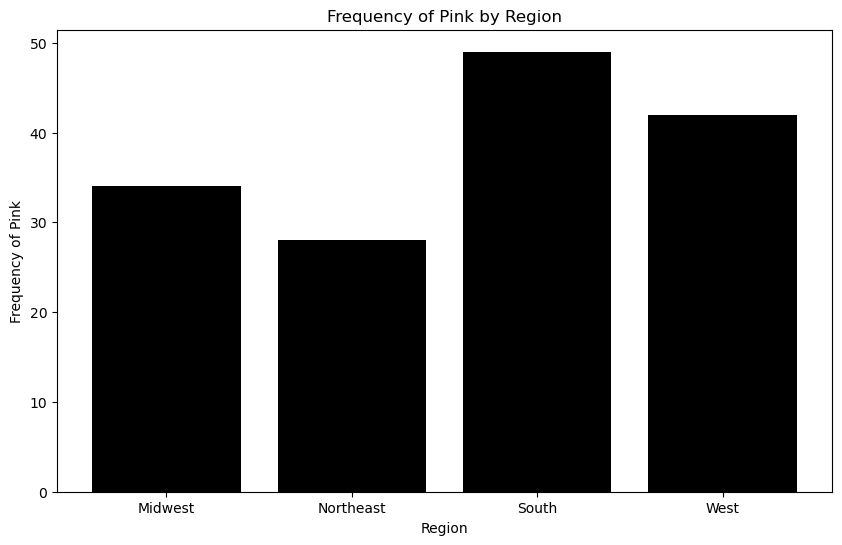

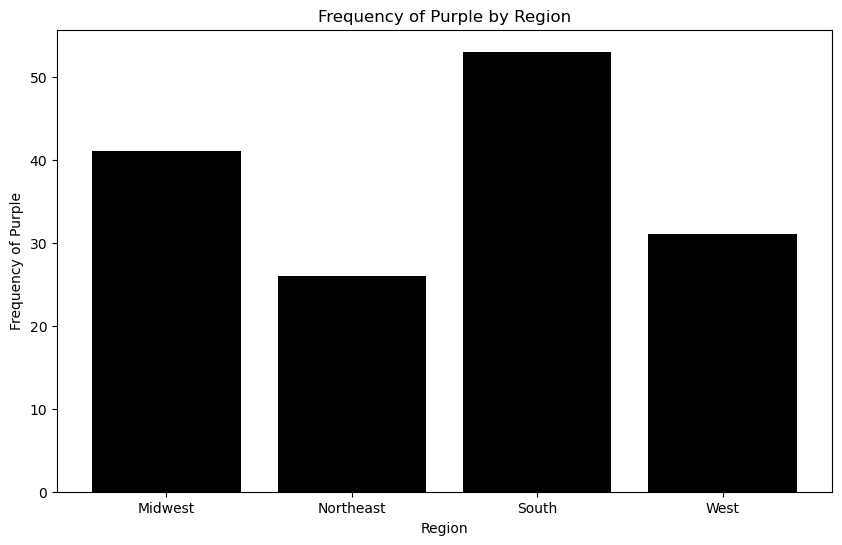

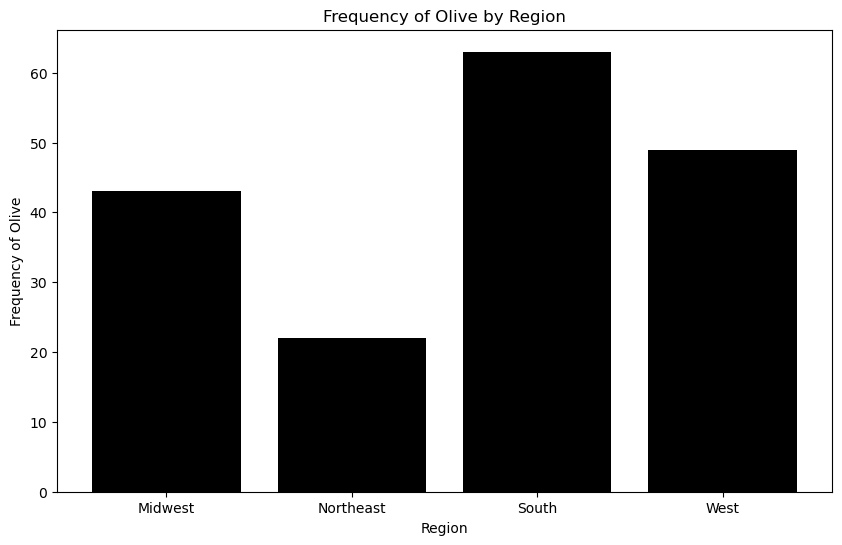

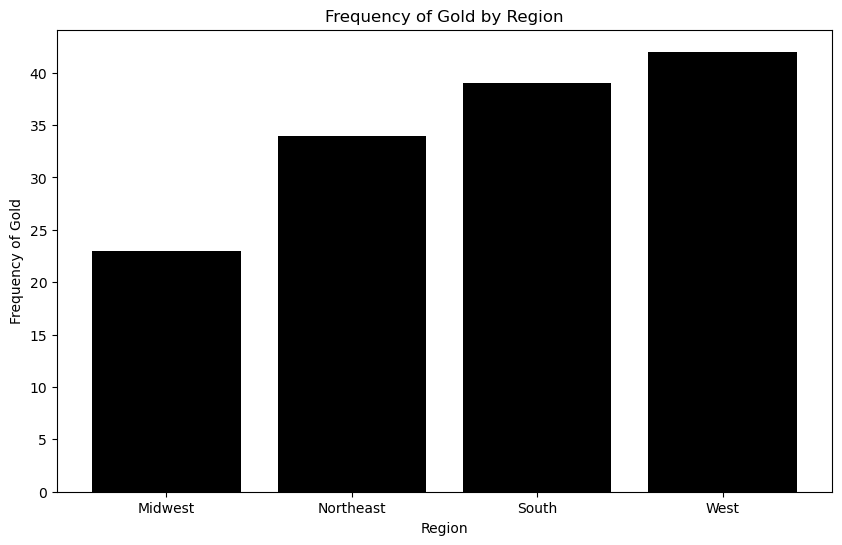

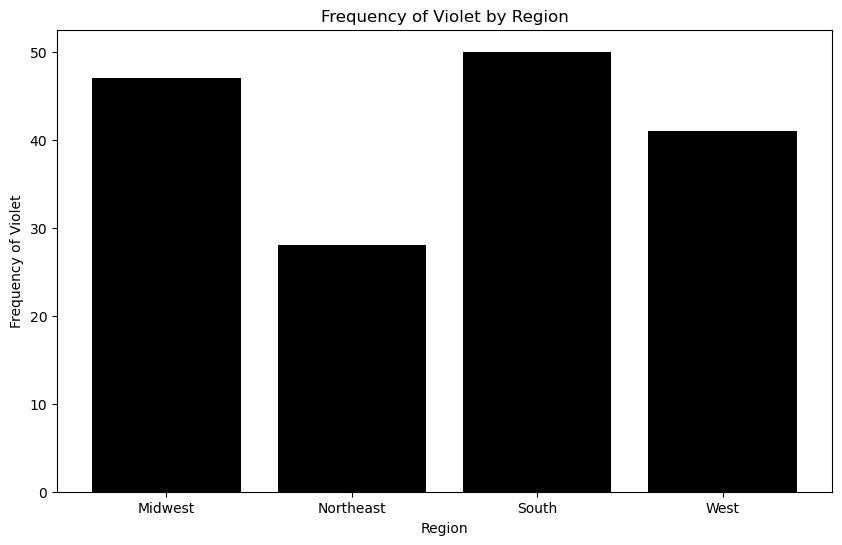

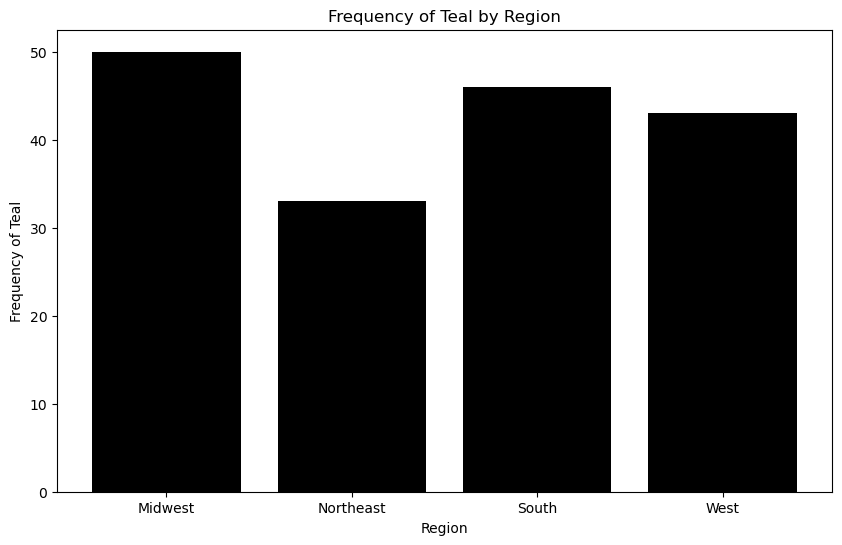

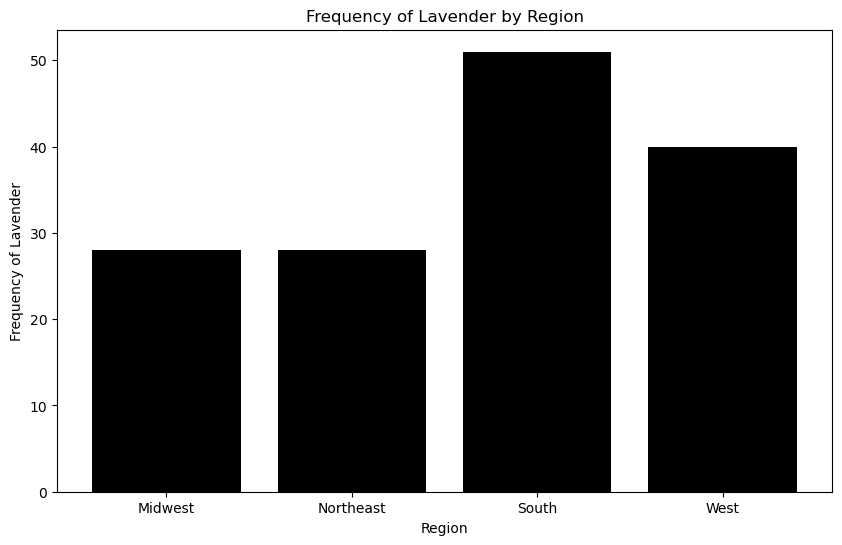

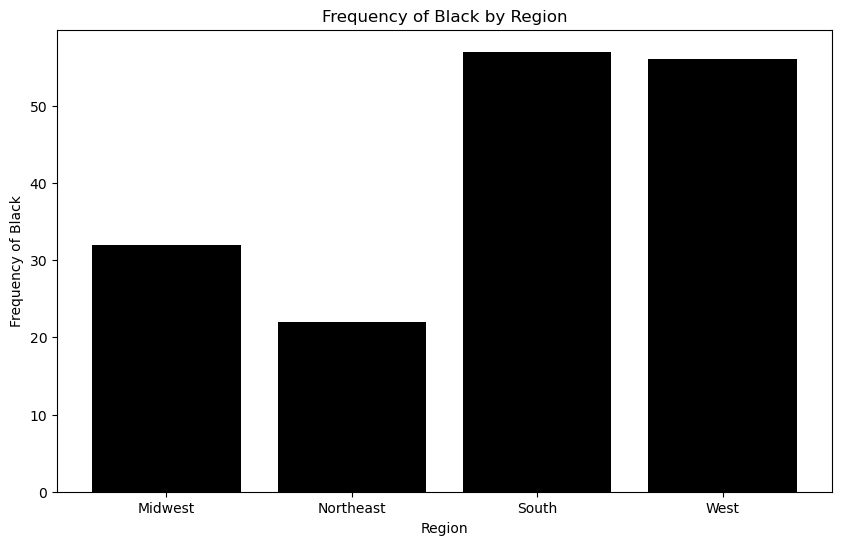

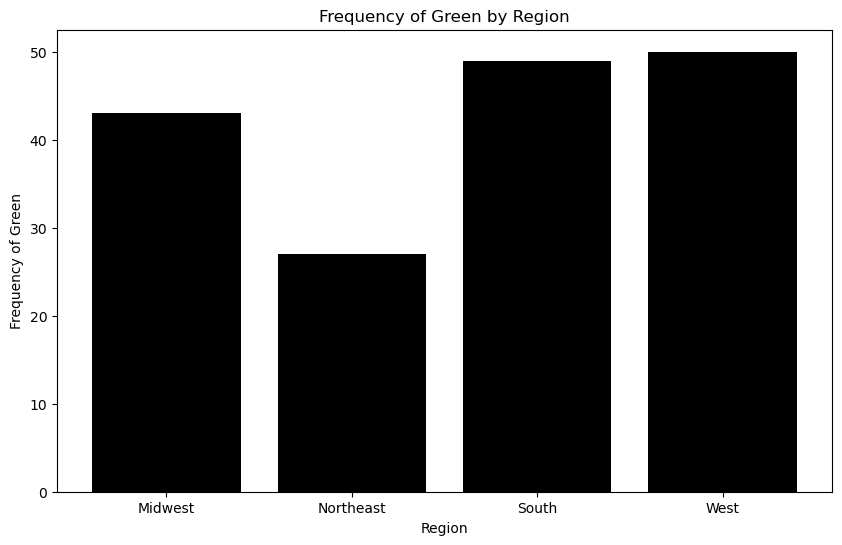

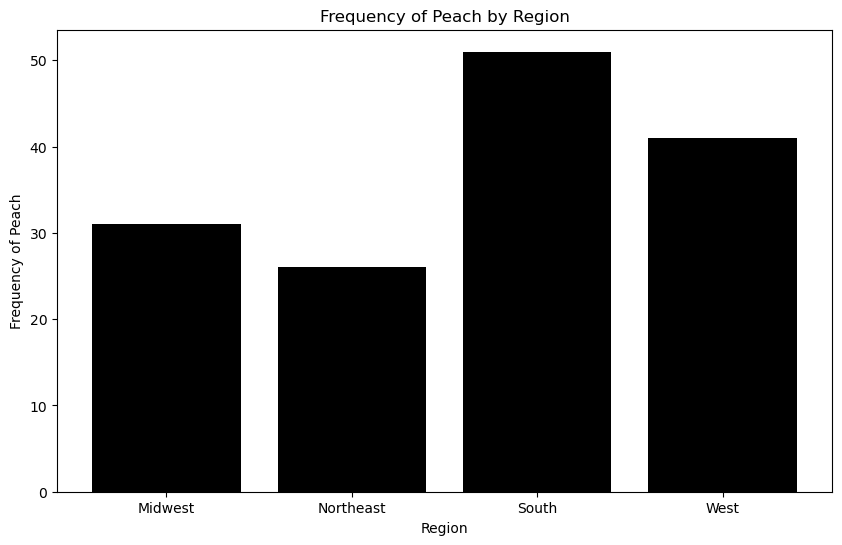

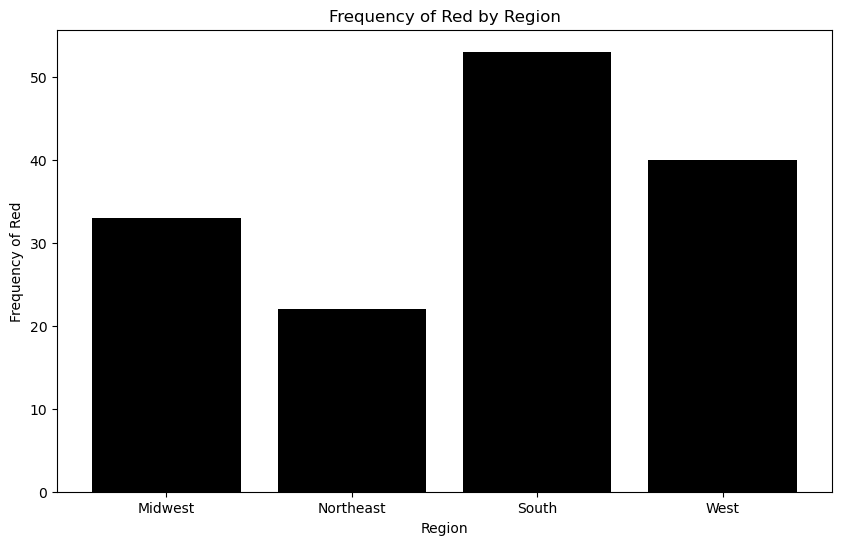

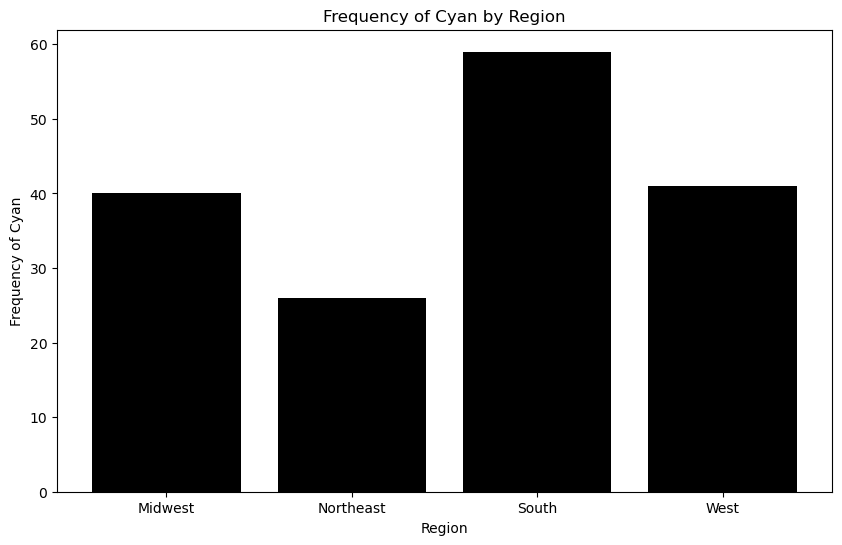

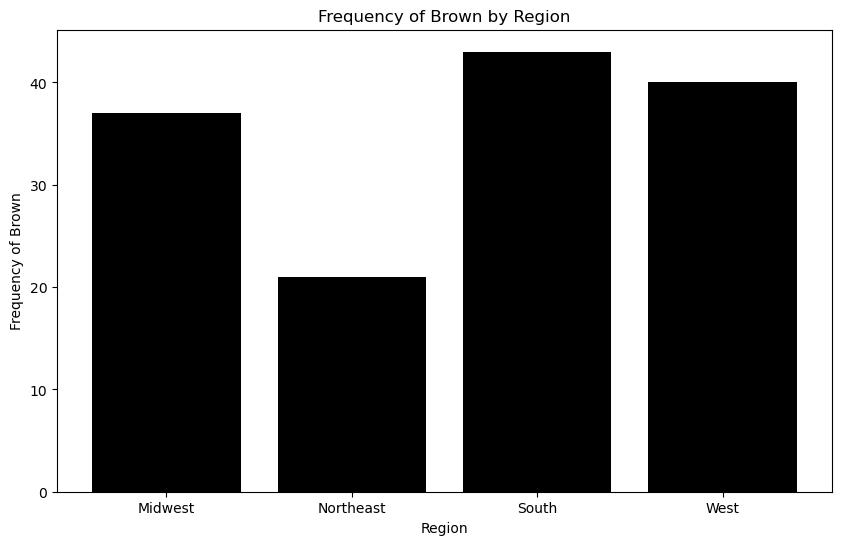

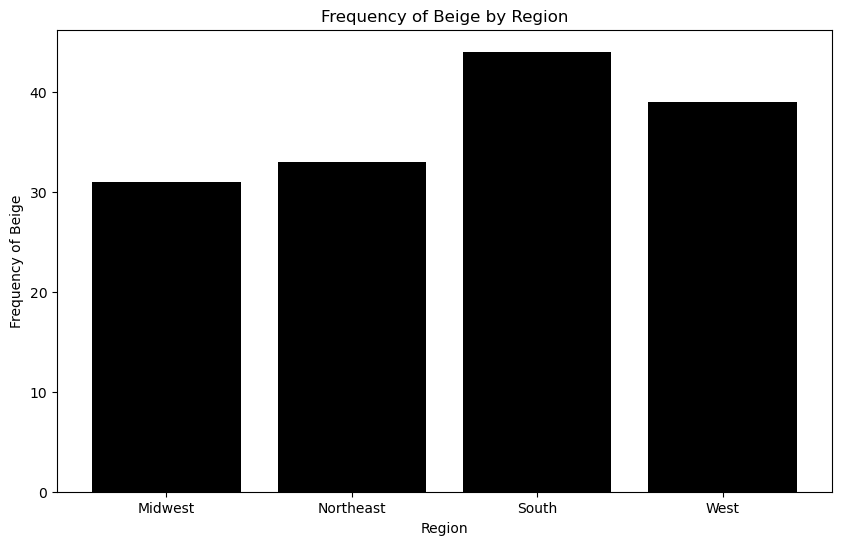

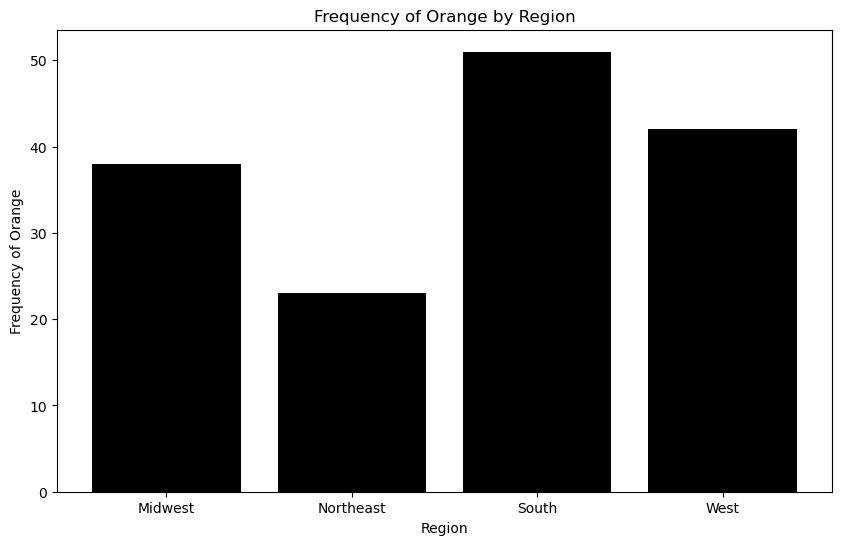

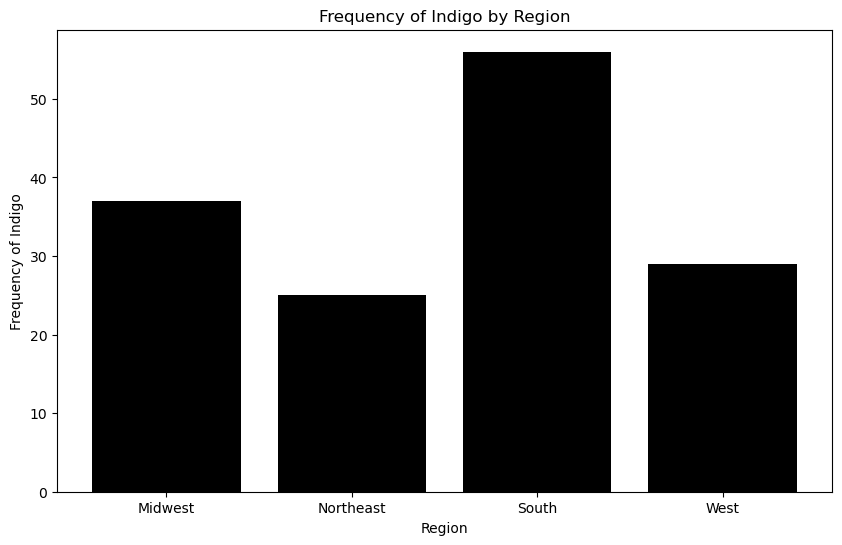

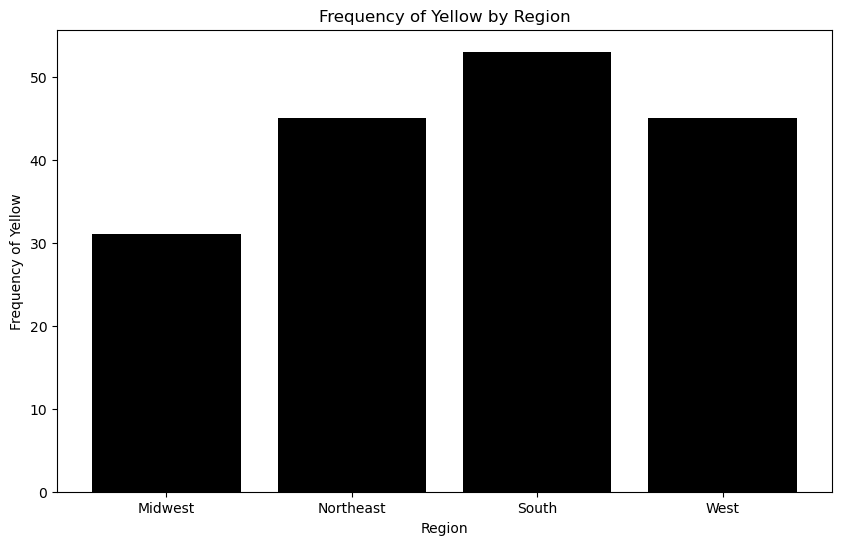

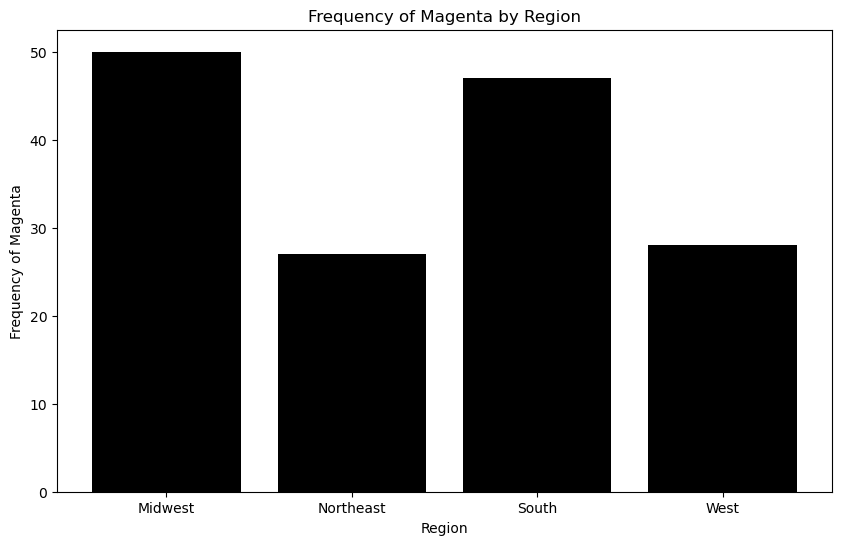

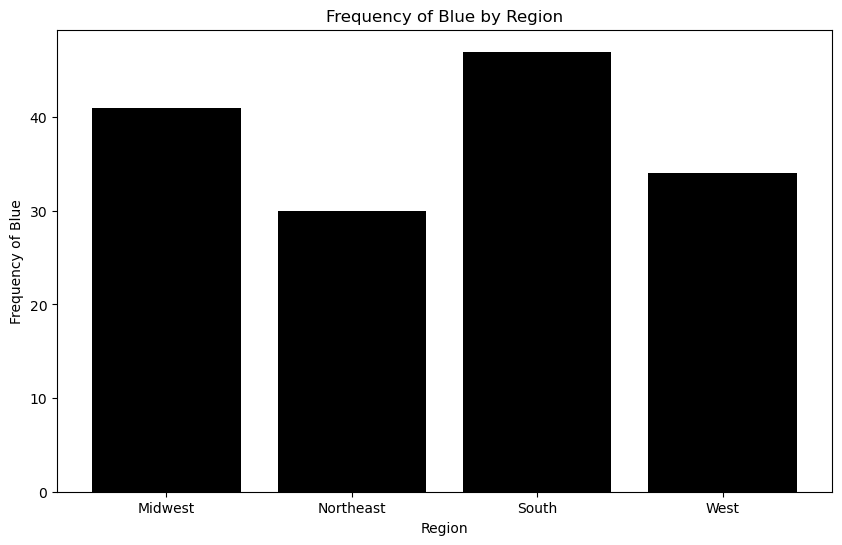

In [41]:
df['Region'] = df['Location'].map(region_mapping)
unique_colors = df['Color'].unique()

for color in unique_colors:
    # Filter for the specific color
    specific_color_df = df[df['Color'] == color]
    
    # Count occurrences by region
    region_counts = specific_color_df['Region'].value_counts().sort_index()
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(region_counts.index, region_counts.values, color='black')  # Assuming the color names are valid
    plt.xlabel('Region')
    plt.ylabel(f'Frequency of {color}')
    plt.title(f'Frequency of {color} by Region')
    plt.show()


In [42]:
# Count the occurrences of each region
region_totals = df['Region'].value_counts()

# Print the totals
print(region_totals)


South        1271
West         1018
Midwest       937
Northeast     674
Name: Region, dtype: int64


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('shopping_trends_updated.csv')

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'ages' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Print outliers
print("Outliers in the 'ages' column:")
print(outliers)



Outliers in the 'ages' column:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('shopping_trends_updated.csv')

# Function to find outliers using IQR
def find_outliers(dataframe, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    return outliers

# Loop through each column
for column in df.columns:
    # Check if the column is numerical
    if df[column].dtype in ['int64', 'float64']:
        # Find outliers
        outliers = find_outliers(df, column)
        # Print outliers
        print(f"Outliers in the '{column}' column:")
        print(outliers)
        print("\n")  # Print new line for better readability


Outliers in the 'Customer ID' column:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


Outliers in the 'Age' column:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


Outliers in the 'Purchase Amount (USD)' column:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


Outliers in th